In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = '/Users/santiagoromero/Documents/Maestria/Modelos Analisis Estadisticos/Tareas/Tarea 1/Archivos/resultadosicfes.csv'
data_frame = pd.read_csv(data, sep=';')

#Obteniendo las variables continuas
variables_continuas = []
data_types = data_frame.dtypes
for columna, dtype in data_types.items():
    if dtype != 'object':
        variables_continuas.append(columna)
        
df_variables = data_frame[variables_continuas]
data_frame_variables = df_variables.drop(columns=['PERCENTIL_GLOBAL'])
data_frame_variables

,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL
0,47,48,37,30,54.0,208
1,60,65,54,59,63.0,299
2,66,57,41,74,64.0,299
3,62,54,61,73,53.0,309
4,63,57,55,57,52.0,288
...,...,...,...,...,...,...
546207,76,78,65,74,58.0,360
546208,75,73,72,67,74.0,360
546209,72,83,71,77,72.0,377
546210,59,61,54,52,46.0,278


In [3]:
variables_continuas.remove('PERCENTIL_GLOBAL')

In [4]:
descriptivo_poblacional = {}
for variable in variables_continuas:
    descriptivo_poblacional[variable] = []

for i, variable in enumerate(variables_continuas):
    datos = data_frame_variables[variable].describe().loc[['mean', 'std', 'max', 'min']]
    descriptivo_poblacional[variable] = datos
    
df_desciptivos_poblacional = pd.DataFrame(descriptivo_poblacional).transpose()
df_desciptivos_poblacional

,mean,std,max,min
PUNT_LECTURA_CRITICA,52.157305,10.537963,100.0,0.0
PUNT_MATEMATICAS,50.606349,11.997649,100.0,0.0
PUNT_C_NATURALES,48.234779,10.764035,100.0,0.0
PUNT_SOCIALES_CIUDADANAS,46.224589,12.140588,100.0,0.0
PUNT_INGLES,48.416891,12.558438,100.0,0.0
PUNT_GLOBAL,246.186464,51.386858,477.0,0.0


In [5]:
#Puntajes
puntaje_matematicas = 55
puntaje_lectura = 60
puntaje_ingles = 70

#Creando filtro y generando nuevo dataframe
filtro_matematicas = data_frame_variables['PUNT_MATEMATICAS'] > puntaje_matematicas
filtro_lectura = data_frame_variables['PUNT_LECTURA_CRITICA'] > puntaje_lectura
filtro_ingles = data_frame_variables['PUNT_INGLES'] > puntaje_ingles

df_puntajes = data_frame_variables[filtro_matematicas & filtro_lectura & filtro_ingles]
df_puntajes

,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL
6,76,70,70,68,72.0,355
29,69,57,63,61,78.0,318
41,64,70,62,52,82.0,318
59,63,67,73,59,73.0,330
60,77,61,61,61,75.0,329
...,...,...,...,...,...,...
546202,100,73,70,72,84.0,396
546206,100,100,82,75,100.0,450
546208,75,73,72,67,74.0,360
546209,72,83,71,77,72.0,377


In [6]:
#Descriptivos de cada variable continua
#Creando un diccionario que almacena los estadisticos de cada variable

descriptivos_muestral = {}
for variable in variables_continuas:
    descriptivos_muestral[variable] = []

for i, variable in enumerate(variables_continuas):
    datos = df_puntajes[variable].describe().loc[['mean', 'std', 'max', 'min']]
    descriptivos_muestral[variable] = datos
    
df_desciptivos_muestral = pd.DataFrame(descriptivos_muestral).transpose()
df_desciptivos_muestral

,mean,std,max,min
PUNT_LECTURA_CRITICA,69.408085,5.198306,100.0,61.0
PUNT_MATEMATICAS,70.197291,7.434485,100.0,56.0
PUNT_C_NATURALES,67.057223,6.927406,100.0,30.0
PUNT_SOCIALES_CIUDADANAS,67.267163,7.324209,100.0,24.0
PUNT_INGLES,76.937408,6.338497,100.0,71.0
PUNT_GLOBAL,345.662234,24.671212,477.0,237.0


In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_normalized = pd.DataFrame(scaler.fit_transform(df_puntajes), columns=df_puntajes.columns)
df_normalized

,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL
0,1.268115,-0.026538,0.424811,0.100059,-0.778972,0.378496
1,-0.078505,-1.775181,-0.585689,-0.855695,0.167644,-1.121258
2,-1.040377,-0.026538,-0.730046,-2.084522,0.798722,-1.121258
3,-1.232751,-0.430071,0.857882,-1.128768,-0.621202,-0.634851
4,1.460489,-1.237137,-0.874403,-0.855695,-0.305664,-0.675385
...,...,...,...,...,...,...
24583,5.885098,0.376995,0.424811,0.646204,1.114260,2.040386
24584,5.885098,4.008794,2.157096,1.055813,3.638569,4.229216
24585,1.075741,0.376995,0.713525,-0.036477,-0.463433,0.581166
24586,0.498618,1.722106,0.569168,1.328885,-0.778972,1.270242


In [8]:
descriptivos_muestral_normal = {}
for variable in variables_continuas:
    descriptivos_muestral_normal[variable] = []

for i, variable in enumerate(variables_continuas):
    datos = df_normalized[variable].describe().loc[['mean', 'std', 'max', 'min']]
    descriptivos_muestral_normal[variable] = datos
    
df_desciptivos_muestral = pd.DataFrame(descriptivos_muestral_normal).transpose()
df_desciptivos_muestral

,mean,std,max,min
PUNT_LECTURA_CRITICA,-1.012151e-16,1.00002,5.885098,-1.617499
PUNT_MATEMATICAS,-3.948182e-16,1.00002,4.008794,-1.909693
PUNT_C_NATURALES,4.710365e-16,1.00002,4.755524,-5.349474
PUNT_SOCIALES_CIUDADANAS,7.730201e-16,1.00002,4.469220,-5.907538
PUNT_INGLES,-5.371045e-16,1.00002,3.638569,-0.936741
PUNT_GLOBAL,-5.866283e-16,1.00002,5.323631,-4.404504


<Axes: >

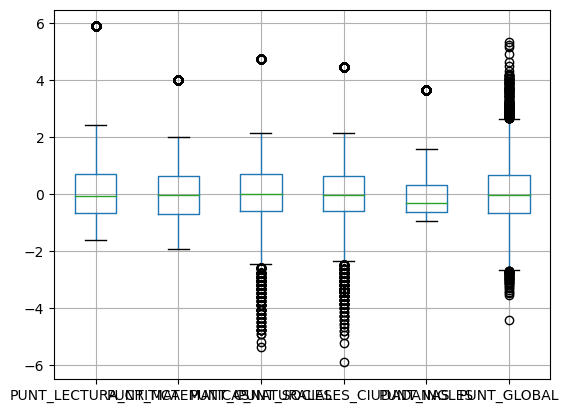

In [9]:
df_normalized.boxplot()